In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import tensorflow
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/kb22/Purchasing-Intention-Prediction/master/data/dataset.csv')

In [3]:
dataset.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3408,2,5.0,0,0.0,3,32.000000,0.000000,0.066667,0.000000,1.0,May,2,2,2,5,Returning_Visitor,True,False
8468,0,0.0,1,8.0,21,936.642857,0.004545,0.008988,0.000000,0.0,Nov,1,1,3,2,Returning_Visitor,True,False
7356,0,0.0,0,0.0,22,817.959070,0.056061,0.079518,0.000000,0.0,Sep,3,2,3,1,Returning_Visitor,True,False
33,0,0.0,0,0.0,10,183.666667,0.040000,0.080000,0.000000,0.0,Feb,1,1,3,1,Returning_Visitor,False,False
2244,6,86.2,0,0.0,49,3003.419048,0.010526,0.015712,4.376916,0.4,May,1,1,4,4,Returning_Visitor,False,False


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.reset_index(inplace = True)
X_test.reset_index(inplace = True)

Text(0.5, 1.0, 'Count of visitors based on revenue generated')

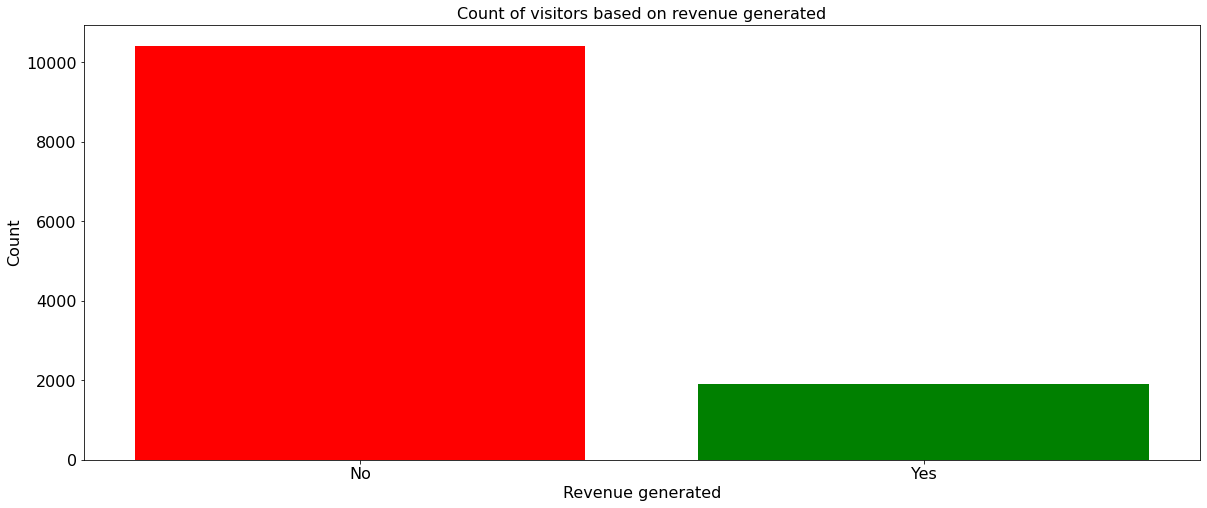

In [7]:
target_distribution = y.value_counts()

plt.figure(figsize = (20, 8))
plt.bar(target_distribution.keys().tolist(), target_distribution.tolist(), color = ['red', 'green'])

plt.xlabel('Revenue generated', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks([0.0, 1.0], ['No', 'Yes'], fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Count of visitors based on revenue generated', fontsize = 16)

In [8]:
corr = dataset.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [9]:
X_train = X_train.drop(['Administrative', 'Informational', 'ProductRelated'], axis = 1)
X_test = X_test.drop(['Administrative', 'Informational', 'ProductRelated'], axis = 1)

In [10]:
X_train.drop(['OperatingSystems', 'Region', 'TrafficType'], axis = 1, inplace = True)
X_test.drop(['OperatingSystems', 'Region', 'TrafficType'], axis = 1, inplace = True)

In [11]:
labelEncoder = LabelEncoder()
X_train.loc[:, 'Month'] = labelEncoder.fit_transform(X_train.loc[:, 'Month'])
X_test.loc[:, 'Month'] = labelEncoder.transform(X_test.loc[:, 'Month'])
X_train.loc[:, 'VisitorType'] = labelEncoder.fit_transform(X_train.loc[:, 'VisitorType'])
X_test.loc[:, 'VisitorType'] = labelEncoder.transform(X_test.loc[:, 'VisitorType'])
X_train.loc[:, 'Weekend'] = labelEncoder.fit_transform(X_train.loc[:, 'Weekend'])
X_test.loc[:, 'Weekend'] = labelEncoder.transform(X_test.loc[:, 'Weekend'])

In [12]:
onehotencoder = OneHotEncoder(categories = 'auto', drop = 'first')
train_cat_features = onehotencoder.fit_transform(X_train.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
train_cat_features = pd.DataFrame(train_cat_features)
test_cat_features = onehotencoder.transform(X_test.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
test_cat_features = pd.DataFrame(test_cat_features)

X_train.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
X_train = X_train.join(train_cat_features)
X_test.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
X_test = X_test.join(test_cat_features)